# LETS GROW MORE - DATA SCIENCE INTERNSHIP

# TASK 1 - IRIS FLOWER CLASSIFICATION USING ML PROJECT

## AUTHOR - Amitabh Kumar Vishwakarma

### **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Iris.csv')
df.head()

,SepalLenghtCm,SepalWidthCm,PetalLenghtCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.tail(10)

,SepalLenghtCm,SepalWidthCm,PetalLenghtCm,PetalWidthCm,Species
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
df.dtypes

SepalLenghtCm    float64
SepalWidthCm     float64
PetalLenghtCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [5]:
df.shape

(150, 5)

### **Cheking Null Values**

In [6]:
df.isnull().sum()

SepalLenghtCm    0
SepalWidthCm     0
PetalLenghtCm    0
PetalWidthCm     0
Species          0
dtype: int64

### **Checking For Duplication**

In [7]:
df[df.duplicated()]

,SepalLenghtCm,SepalWidthCm,PetalLenghtCm,PetalWidthCm,Species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [8]:
df.describe()

,SepalLenghtCm,SepalWidthCm,PetalLenghtCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### **Checking Correlation**

<AxesSubplot:>

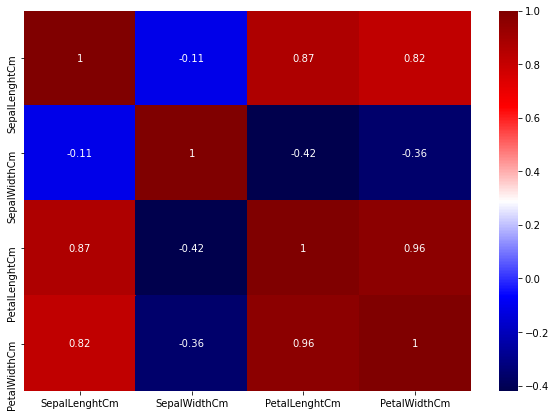

In [9]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,cmap="seismic")

### **Data Visualization**

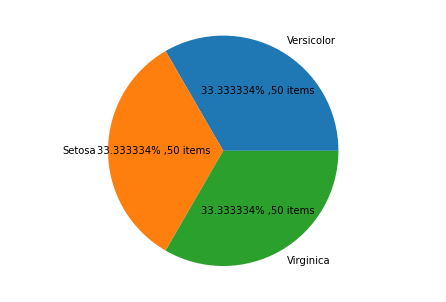

In [10]:
fig=plt.figure()
ax =fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['Versicolor','Setosa','Virginica']
size = [50,50,50]
ax.pie(size, labels=labels,autopct=lambda p:f'{p:2f}% ,{p*sum(size)/100 :.0f} items')
plt.show()

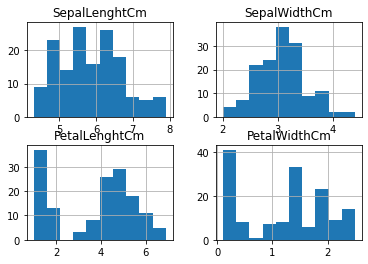

In [11]:
df.hist()
plt.show()

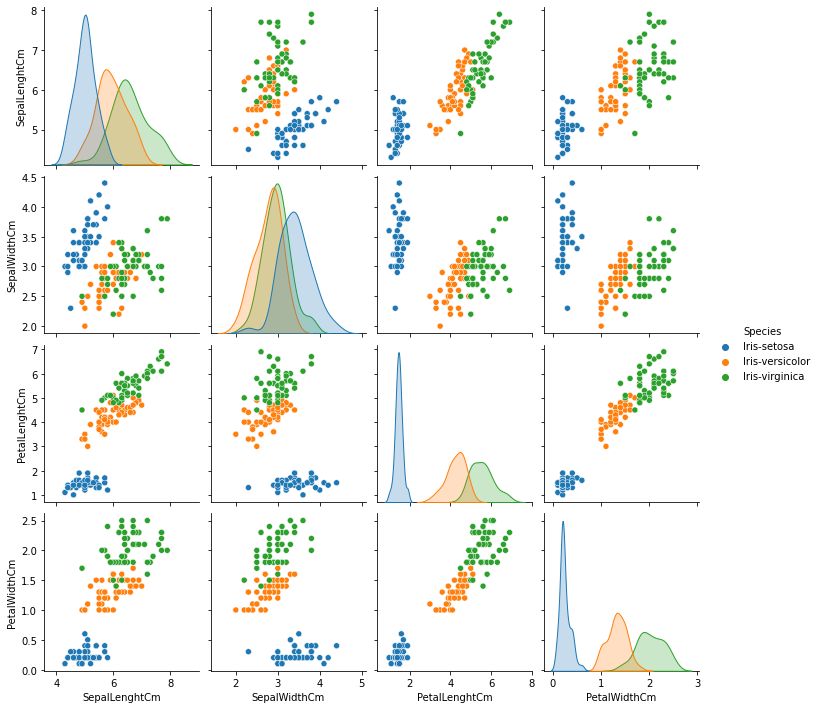

In [12]:
sns.pairplot(df,hue="Species")

### **Label Encoder**

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()#LabelEncoder is used to normalize labels
df['Species'] = le.fit_transform(df['Species']) #fit_transform returns encoded labels
df.head()

,SepalLenghtCm,SepalWidthCm,PetalLenghtCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
X = df.drop(columns=['Species'])#dropping the column Species
y = df['Species']
X[:5]#return list from beginning until index is 5

,SepalLenghtCm,SepalWidthCm,PetalLenghtCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### **Splitting Dataset**

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### **Supervised Machine Learning Models(Selecting Models and Metrics)**

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [17]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
svm = SVC()
nb = GaussianNB()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

### **Training and Evaluation of Models**

In [18]:
models = [lr, knn, svm, nb, dt, rf]
scores = []

for model in models:
    model.fit(X_train,y_train)#logisticRegression.fit(X_train,y_train)#fit support vector classifier to training set
    y_pred = model.predict(X_test)##logisticRegression.fit(X_train)#predicts the test results
    scores.append(accuracy_score(y_test, y_pred))#accuracy on test set results
    print("Accuracy of " +type(model).__name__+ "is",accuracy_score(y_test, y_pred))

Accuracy of LogisticRegressionis 0.9777777777777777
Accuracy of KNeighborsClassifieris 0.9777777777777777
Accuracy of SVCis 0.9777777777777777
Accuracy of GaussianNBis 0.9333333333333333
Accuracy of DecisionTreeClassifieris 0.9555555555555556
Accuracy of RandomForestClassifieris 0.9555555555555556


In [19]:
results = pd.DataFrame({
    'Models':['Logistic Regression','K-Nearest Neighbours','Support Vector Machine','Naive Bayes','Decision Tree',
              'Random Forest'],'Accuracy': scores})
results = results.sort_values(by='Accuracy',ascending=False)
print(results)

                   Models  Accuracy
0     Logistic Regression  0.977778
1    K-Nearest Neighbours  0.977778
2  Support Vector Machine  0.977778
4           Decision Tree  0.955556
5           Random Forest  0.955556
3             Naive Bayes  0.933333


**Here we got the accuracy of 97.78 percent by using Logistic Regression, K-Nearest Neighbours and Support Vector Machine.Also 
we got accuracy of 95.55 percent using Decision Tree, Random Forest along with Naive Bayes which has 93.33 percent accuracy.**